In [2]:
import seaborn as sns
import pandas as pd
import csv

In [43]:
j = 5
df1 = pd.read_csv('./csv_files_mrpp/latency_walks.csv')
df2 = pd.read_csv('./csv_files_mrpp/through_modified_basic.csv')
df3 = pd.read_csv('./csv_files_mrpp/through_modified_FHUM.csv')

# print(df2.columns)
df1.astype({'random_string': 'str', 'graph': 'str', 'priority_nodes': 'str', 'init_bots': 'int'})
df2.astype({'random_string': 'str', 'graph': 'str', 'priority_nodes': 'str', 'init_bots': 'int', 'depth' : 'int'})
df3.astype({'random_string': 'str', 'graph': 'str', 'priority_nodes': 'str', 'init_bots': 'int', 'depth' : 'int'})
# df1 = df1
# print(df1.head)
g = 'cair'

df4 = df1[df1['graph'] == g]

df4.rename(columns = {'parameters': 'depth'}, inplace = True)
# df4['depth'] = 0
df5 = df2[df2['graph'] == g]
df6 = df3[df3['graph'] == g]

df7 = pd.concat([df5, df6], axis = 0)
df7.drop(columns = 'time_periods', inplace = True)
print(df4.columns)
print(df7.columns)
df8 = pd.concat([df7, df4], axis = 0)

Index(['algo_name', 'done', 'graph', 'init_bots', 'init_locations',
       'coefficients', 'priority_nodes', 'random_string', 'sim_length',
       'use_sim_time', 'avg_idle', 'priority_avg_idle',
       'non_priority_avg_idle', 'max_idle', 'priority_max_idle',
       'non_priority_max_idle', 'avg_ratio', 'depth'],
      dtype='object')
Index(['algo_name', 'coefficients', 'depth', 'done', 'graph', 'init_bots',
       'init_locations', 'priority_nodes', 'random_string', 'sim_length',
       'use_sim_time', 'avg_idle', 'priority_avg_idle',
       'non_priority_avg_idle', 'max_idle', 'priority_max_idle',
       'non_priority_max_idle', 'avg_ratio'],
      dtype='object')


/tmp/ipykernel_76295/759757359.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['depth'] = 0


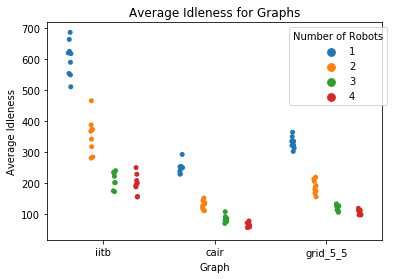

In [4]:
p1 = sns.stripplot(x = 'graph', y = 'avg_idle', data = df1, hue = 'init_bots', jitter = 0.05, dodge = True)
p1.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
p1.set_xlabel('Graph')
p1.set_ylabel('Average Idleness')
p1.set_title('Average Idleness for Graphs')
p1.figure.savefig('sim_avg_df1.png', bbox_inches='tight')

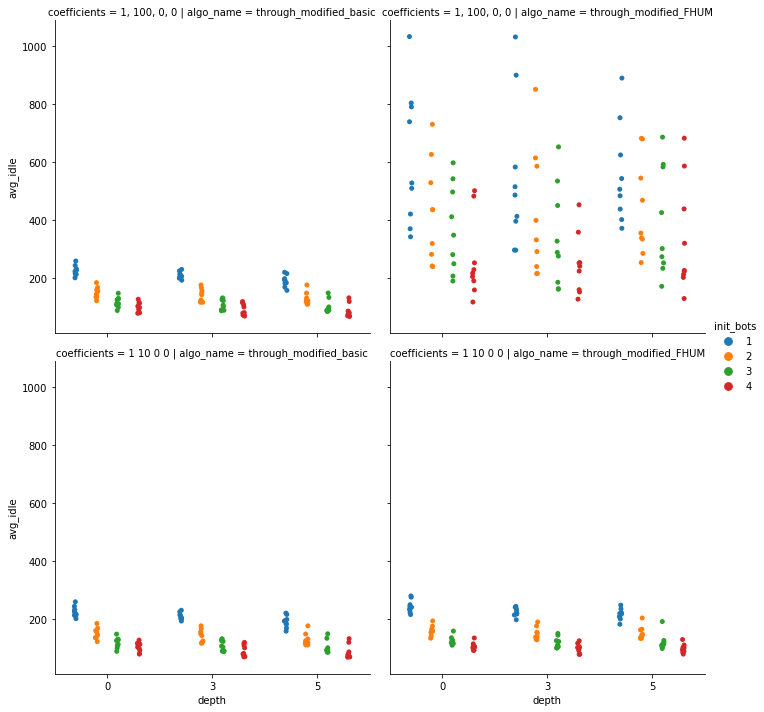

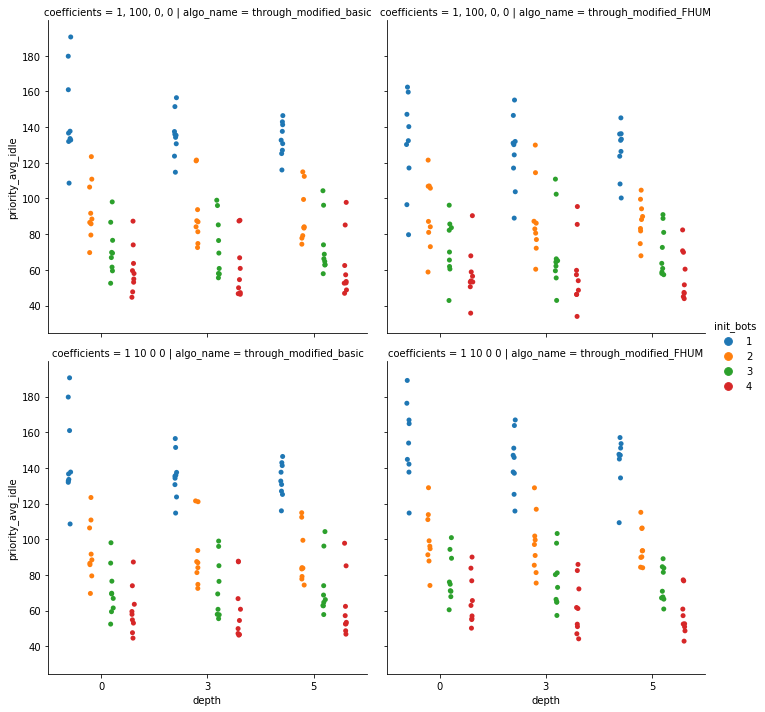

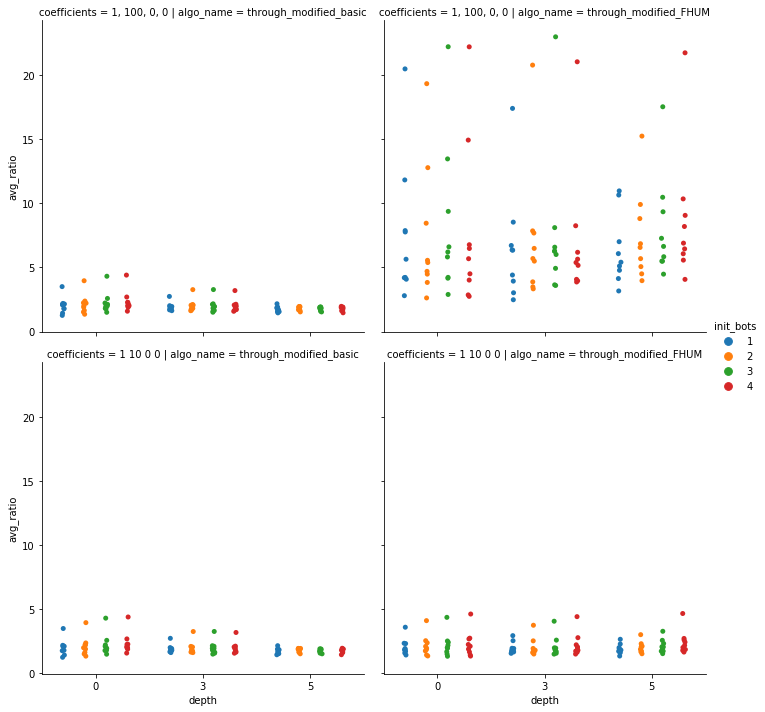

In [44]:
p2 = sns.catplot(x = 'depth', y = 'avg_idle', data = df7, hue = 'init_bots', col = 'algo_name', jitter = 0.05, dodge = True, kind = 'strip', row = 'coefficients')
# p2.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
# p2.set_xlabel('Graph')
# p2.set_ylabel('Average Idleness')
# p2.set_title('Average Idleness for Graphs')
p2.figure.savefig('sim_avg_{}.png'.format(g), bbox_inches='tight')

p3 = sns.catplot(x = 'depth', y = 'priority_avg_idle', data = df7, hue = 'init_bots', col = 'algo_name', jitter = 0.05, dodge = True, kind = 'strip', row = 'coefficients')
# p2.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
# p2.set_xlabel('Graph')
# p2.set_ylabel('Average Idleness')
# p2.set_title('Average Idleness for Graphs')
p3.figure.savefig('prior_avg_{}.png'.format(g), bbox_inches='tight')

p4 = sns.catplot(x = 'depth', y = 'avg_ratio', data = df7, hue = 'init_bots', col = 'algo_name', jitter = 0.05, dodge = True, kind = 'strip', row = 'coefficients')
p4.figure.savefig('avg_ratio_{}.png'.format(g), bbox_inches='tight')

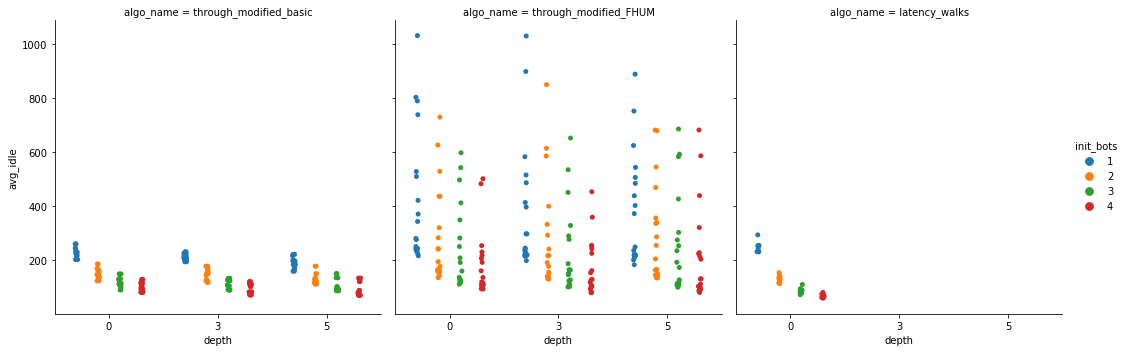

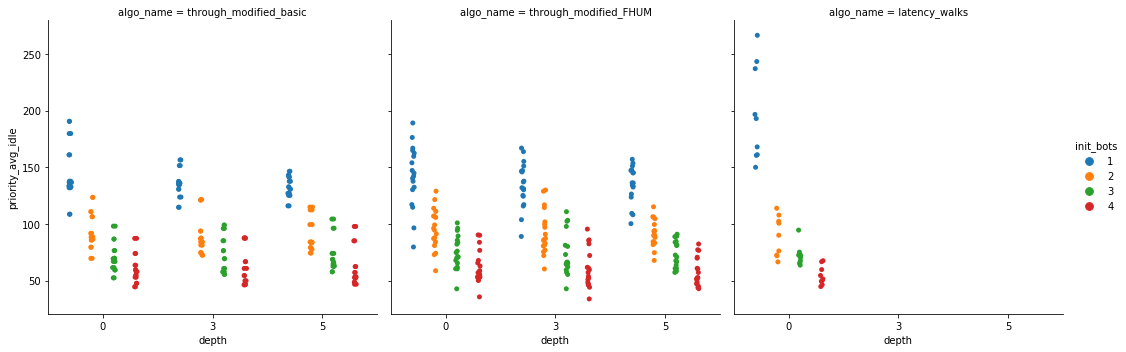

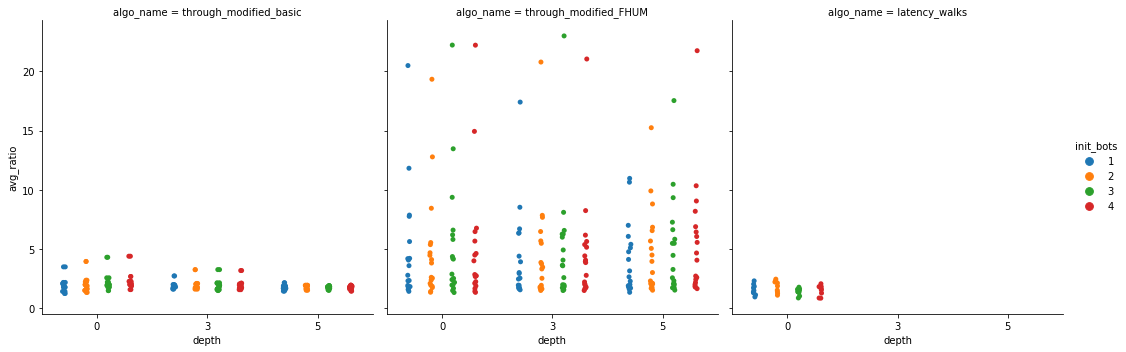

In [45]:
p2 = sns.catplot(x = 'depth', y = 'avg_idle', data = df8, hue = 'init_bots', col = 'algo_name', jitter = 0.05, dodge = True, kind = 'strip')
p2.figure.savefig('sim_avg_{}_comp.png'.format(g), bbox_inches='tight')

p3 = sns.catplot(x = 'depth', y = 'priority_avg_idle', data = df8, hue = 'init_bots', col = 'algo_name', jitter = 0.05, dodge = True, kind = 'strip')
p3.figure.savefig('prior_avg_{}_comp.png'.format(g), bbox_inches='tight')

p4 = sns.catplot(x = 'depth', y = 'avg_ratio', data = df8, hue = 'init_bots', col = 'algo_name', jitter = 0.05, dodge = True, kind = 'strip')
p4.figure.savefig('avg_ratio_{}_comp.png'.format(g), bbox_inches='tight')

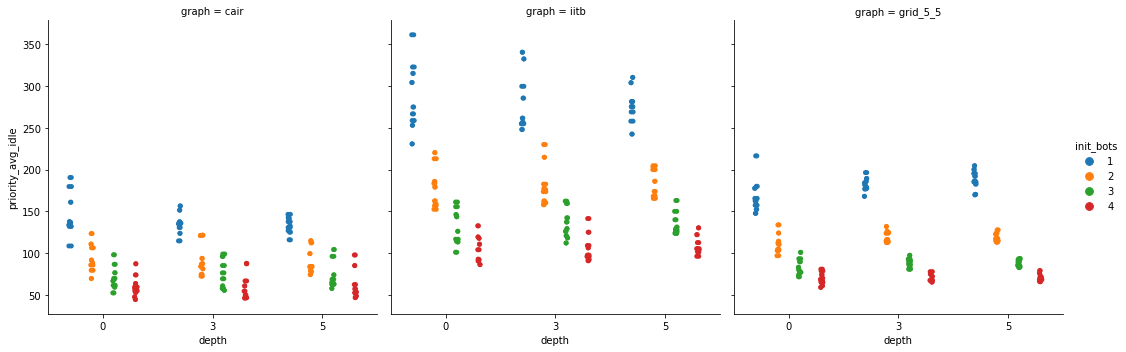

In [7]:
p3 = sns.catplot(x = 'depth', y = 'priority_avg_idle', data = df2, hue = 'init_bots', col = 'graph', jitter = 0.05, dodge = True, kind = 'strip')
# p2.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
# p2.set_xlabel('Graph')
# p2.set_ylabel('Average Idleness')
# p2.set_title('Average Idleness for Graphs')
p3.figure.savefig('sim_prior_avg_df2.png', bbox_inches='tight')

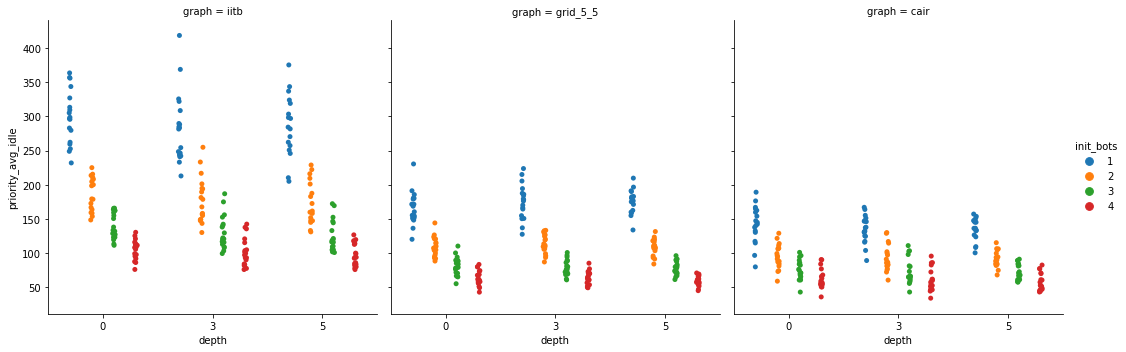

In [8]:
p3 = sns.catplot(x = 'depth', y = 'priority_avg_idle', data = df3, hue = 'init_bots', col = 'graph', jitter = 0.05, dodge = True, kind = 'strip')
# p2.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
# p2.set_xlabel('Graph')
# p2.set_ylabel('Average Idleness')
# p2.set_title('Average Idleness for Graphs')
p3.figure.savefig('sim_prior_avg_df3.png', bbox_inches='tight')

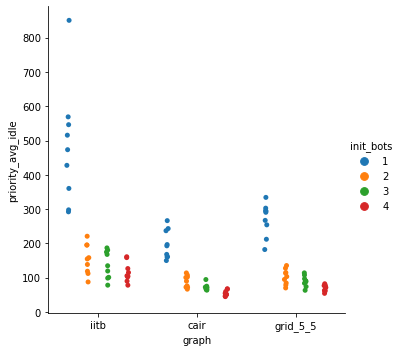

In [9]:
p3 = sns.catplot(x = 'graph', y = 'priority_avg_idle', data = df1, hue = 'init_bots', jitter = 0.05, dodge = True, kind = 'strip')
# p2.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
# p2.set_xlabel('Graph')
# p2.set_ylabel('Average Idleness')
# p2.set_title('Average Idleness for Graphs')
p3.figure.savefig('sim_prior_avg_df1.png', bbox_inches='tight')

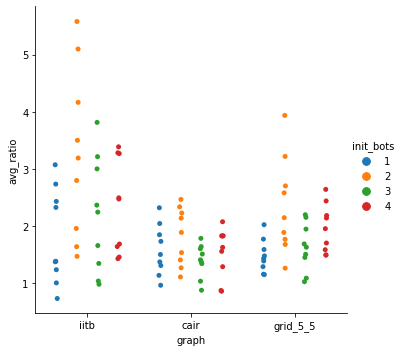

In [10]:
p3 = sns.catplot(x = 'graph', y = 'avg_ratio', data = df1, hue = 'init_bots', jitter = 0.05, dodge = True, kind = 'strip')
# p2.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
# p2.set_xlabel('Graph')
# p2.set_ylabel('Average Idleness')
# p2.set_title('Average Idleness for Graphs')
p3.figure.savefig('sim_avg_ratio_df1.png', bbox_inches='tight')

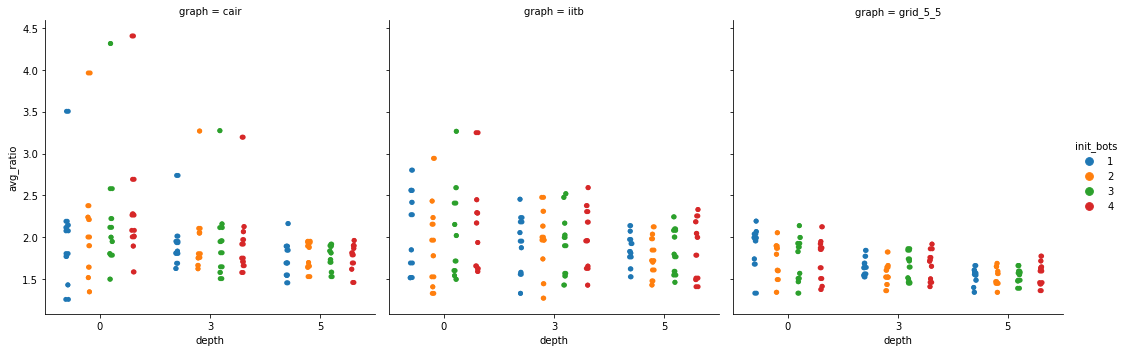

In [11]:
p3 = sns.catplot(x = 'depth', y = 'avg_ratio', data = df2, hue = 'init_bots', col = 'graph', jitter = 0.05, dodge = True, kind = 'strip')
# p2.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
# p2.set_xlabel('Graph')
# p2.set_ylabel('Average Idleness')
# p2.set_title('Average Idleness for Graphs')
p3.figure.savefig('sim_avg_ratio_df2.png', bbox_inches='tight')

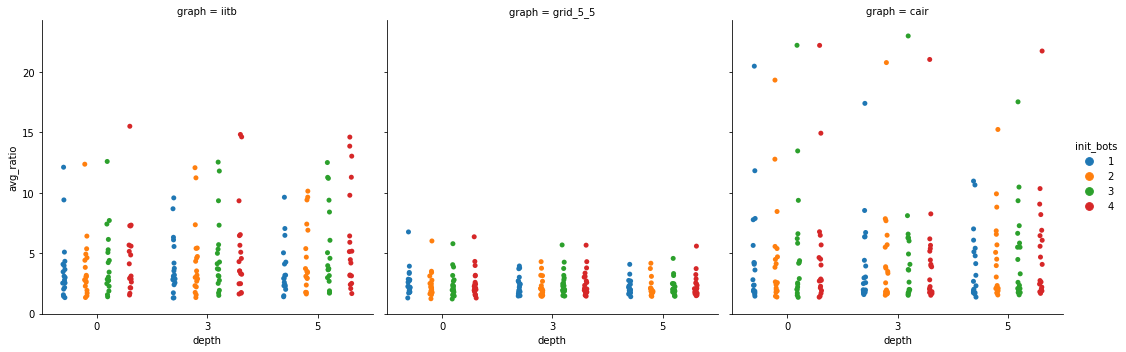

In [12]:
p3 = sns.catplot(x = 'depth', y = 'avg_ratio', data = df3, hue = 'init_bots', col = 'graph', jitter = 0.05, dodge = True, kind = 'strip')
# p2.legend(title = 'Number of Robots', bbox_to_anchor = [1.03, 1])
# p2.set_xlabel('Graph')
# p2.set_ylabel('Average Idleness')
# p2.set_title('Average Idleness for Graphs')
p3.figure.savefig('sim_avg_ratio_df3.png', bbox_inches='tight')